# PHILOSOPHY NETWORKS:
## Extraction of Sentence-Co-Occurring Relationships among Concepts 
# Friedrich Nietzsche's Thus Spake Zarathustra

In [1]:
import nltk

In [2]:
import os
import re
import csv
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag.stanford import StanfordNERTagger
# java_path = "C:/Program Files/Java/jdk1.8.0_05/bin/java.exe"
# os.environ['JAVAHOME'] = java_path

# path2 = 'C:/Users/Pantelis/Desktop/NOTEBOOK/stanfordner'
# st =  StanfordNERTagger(path2+'/classifiers/english.all.3class.distsim.crf.ser.gz', 'stanford-ner.jar')

st =  StanfordNERTagger('/Users/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/stanfordner/classifiers/english.all.3class.distsim.crf.ser.gz', '/Users/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/stanfordner/stanford-ner.jar')
# st = StanfordNERTagger('classifiers/english.all.3class.distsim.crf.ser.gz','/home/sergios-len/Downloads/stanford-ner-2015-12-09/stanford-ner.jar')


# f1 = open('Texts/Balzac_ColonelChabert.txt','r')

import codecs
f1 = codecs.open('Texts/Nietzsche_ThusSpakeZarathustra.txt', "r", encoding="utf-8")
f1Temp = codecs.open("tempASCII", "w", encoding="ascii", errors="ignore")
f1Temp.write('Texts/Nietzsche_ThusSpakeZarathustra.txt')

# f2 = open('Texts/NER_Results.txt','w')
# f3 = open('Texts/NER_PERSONS.txt','w')
# f4 = open('Texts/NER_Unique_PERSONS.txt','w')
# f5 = open('Texts/NER_LOCATIONS.txt','w')
# f6 = open('Texts/ALL_DISTANCE_CASES.txt','w')
# f7 = open('Texts/uniquenames.csv','w')

book=f1.read()
persons =[]

# Tagging of words with PERSON,LOCATION, ORGANISATION
results2= st.tag(book.split())


for name,entity in results2:
    if entity == "PERSON":
        if name not in persons:
            persons.append(name)

# dictionary with frequence of names

persons1=[]
for elem in persons:
    persons1.append(elem.strip('.').strip('"').strip(','))
for k in persons1:
    if len(k) == 2:
        persons1.remove(k)
persons1.sort()

temp= list(set(persons1))
unique_persons_list = [s for s in temp if len(s) != 1]

unique_persons_list.sort()

# book.replace("Comtesse","Countess")
# book.replace("Madame Ferraud","Countess Ferraud")
# book.replace("M. Ferraud","Comte Ferraud")
# book.replace("Monsieur Ferraud","Comte Ferraud")

# book.replace("Mademoiselle","Mlle.")
# book.replace("Mlle. de Cominges","Mlle. Blanche")
# book.replace("Madame la General","Mdme. de Cominges")
# book.replace("Comtesse","Mdme. de Cominges")
# book.replace("Widow de Cominges","Mdme. de Cominges")




book_in_paragraphs = book.split('\n\n')



selection= input("1. sentences\n 2. paragraph\n")
if selection ==1:
    ALL_sentences=sent_tokenize(book)
else:
    ALL_sentences=book_in_paragraphs
combinations_persons = list(itertools.combinations(unique_persons_list,2))

len_list = len(combinations_persons)

couples =[]
distances= []
occurences = []
list1 = []
list2= []
for i in range(1,len_list):
    for j in ALL_sentences:
        temp= list(combinations_persons[i])

        out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
        if out :
#             if  len(out[0])<=2:
#                 couples.append(str(temp[0])+' '+ str(temp[1]))
#             else:
            occurences.append(str(temp[0])+' '+ str(temp[1]))

            distances.append(str(temp[0])+' '+ str(temp[1])+": distance = "+str(len(out[0])))

        out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
#         f6.write( "\n Person1: "+ str(temp[1])+" to Person2: " +str(temp[0]) + "\n..............\n")
        if out2 :
#             if  len(out2[0])<=2:
#                 couples.append(str(temp[1])+' '+ str(temp[0]))
#             else:
            occurences.append(str(temp[1])+' '+ str(temp[0]))

            distances.append(str(temp[1])+' '+ str(temp[0])+": distance = "+str(len(out2[0])))

print "--------------DISTANCES---------------"
print distances
print "--------------------------------------"


# temp= list(set(couples))
# unique_couples_list = [s for s in temp if len(s) != 1]
# unique_couples_list.sort()

# for k in unique_couples_list:
#     whole_name=k.split(' ')
#     temp1 = whole_name[1]+ " "+whole_name[0]
#     if  temp1 in unique_couples_list:
#         unique_couples_list.remove(temp1)






1. sentences
 2. paragraph
1
--------------DISTANCES---------------
['Caesar God: distance = 14', 'Zarathustra Cupid: distance = 11', 'Ere Dudu: distance = 325', 'Dudu God: distance = 109', 'Ere Fain: distance = 31', 'Ere Fain: distance = 12', 'Fain Ere: distance = 18', 'Fain Ere: distance = 14', 'Fain Ere: distance = 163', 'Ere God: distance = 99', 'God Ere: distance = 50', 'Ere God: distance = 54', 'Ere God: distance = 53', 'God Ere: distance = 111', 'Ere God: distance = 11', 'Ere God: distance = 69', 'Ere God: distance = 5', 'Ere God: distance = 1', 'Ere God: distance = 7', 'Ere God: distance = 19', 'Ere God: distance = 30', 'God Ere: distance = 48', 'God Ere: distance = 54', 'Ere God: distance = 15', 'Ere God: distance = 235', 'Ere God: distance = 1', 'Ere God: distance = 147', 'God Ere: distance = 8', 'Ere God: distance = 93', 'Ere God: distance = 6', 'Ere God: distance = 12', 'God Ere: distance = 60', 'Ere God: distance = 5', 'God Ere: distance = 161', 'Ere God: distance = 1', 'E

In [3]:
# print "-------------- Unique COUPLES-----------------"
# print unique_couples_list
# print "--------------------------------------"

In [4]:
###################################################################################   2

# for k in unique_couples_list:
#     whole_name=k.split(' ')
#     #print whole_name
#     #print whole_name[0]
#     #print whole_name[1]
#     temp =whole_name[0]+"--"+whole_name[1]
#     if whole_name[0] in unique_persons_list:
#         unique_persons_list.remove(whole_name[0])
#     if whole_name[1] in unique_persons_list:
#         unique_persons_list.remove(whole_name[1])
#     if temp in unique_persons_list:
#         unique_persons_list.remove(temp)
#     unique_persons_list.append(k)
#     book.replace(whole_name[0],k)
#     book.replace(whole_name[1],k)

# temp= list(set(unique_persons_list))
# unique_persons_list2 = [s for s in temp if len(s) != 1]
# unique_persons_list2.sort()


# print '--------- Unique  names 2------------'
# for k in unique_persons_list2:
#     print k

# print "-----------------------------------"



In [17]:
unique_persons_list2=[
"moral","good","evil","master","slave","evolve","metamorphoses","virtue","body","joy","passion",
    "death","goal","man","woman","child","mirror","happy","isle","tarantula","wise","song",
    "self","surpass","sublime","land","culture","poet","event","soothsayer","bliss","return",
    "home","spirit","gravity","convalescent","honey","sacrifice","cry","distress",
    "kings","leech","magician","beggar","shadow","noontide","melancholy","science","desert",
    "drunken","sign"
]
#"thing",
print  len(unique_persons_list2)




51


In [18]:

###################################################################################   3

if selection ==1:
    ALL_sentences=sent_tokenize(book)
else:
    ALL_sentences=book_in_paragraphs

#ALL_sentences=sent_tokenize(book)
combinations_persons = list(itertools.combinations(unique_persons_list2,2))

len_list = len(combinations_persons)

couples =[]
distances= []
occurences = []
list1 = []
list2= []
for i in range(1,len_list):
    for j in ALL_sentences:
        temp= list(combinations_persons[i])

        out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
        if out :
#             if  len(out[0])<=2:
#                 couples.append(str(temp[0])+' '+ str(temp[1]))
#             else:
            occurences.append(str(temp[0])+' - '+ str(temp[1]))

            distances.append(str(temp[0])+' '+ str(temp[1])+": distance = "+str(len(out[0])))


        out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
#         f6.write( "\n Person1: "+ str(temp[1])+" to Person2: " +str(temp[0]) + "\n..............\n")
        if out2 :
#             if  len(out2[0])<=2:
#                 couples.append(str(temp[1])+' '+ str(temp[0]))
#             else:
            occurences.append(str(temp[1])+' - '+ str(temp[0]))

            distances.append(str(temp[1])+' '+ str(temp[0])+": distance = "+str(len(out2[0])))


#print ALL_sentences
print "--------------DISTANCES---------------"
print distances
print "--------------------------------------"

print "--------------occurences-----------------"
print occurences
print "--------------------------------------"

# temp= list(set(couples))
# unique_couples_list = [s for s in temp if len(s) != 1]
# unique_couples_list.sort()


# print "-------------- Unique COUPLES-----------------"
# print unique_couples_list
# print "--------------------------------------"


dict_occurences={}
for i in occurences:
    if i not in dict_occurences:
        dict_occurences[i] = 1
    else:
        dict_occurences[i] = dict_occurences[i]+1


print '------ Number of co-occurences of 2 names--------------'

for i in dict_occurences:
    print i, dict_occurences[i]

print "-----------------------------------"


--------------DISTANCES---------------
['moral poet: distance = 27', 'good evil: distance = 6', 'good evil: distance = 5', 'evil good: distance = 5', 'good evil: distance = 49', 'good evil: distance = 6', 'good evil: distance = 5', 'good evil: distance = 5', 'good evil: distance = 9', 'good evil: distance = 5', 'good evil: distance = 5', 'good evil: distance = 5', 'good evil: distance = 7', 'good evil: distance = 5', 'good evil: distance = 5', 'good evil: distance = 5', 'good evil: distance = 6', 'good evil: distance = 5', 'good evil: distance = 5', 'good evil: distance = 5', 'good evil: distance = 5', 'evil good: distance = 25', 'evil good: distance = 58', 'good evil: distance = 6', 'evil good: distance = 2', 'good evil: distance = 7', 'good evil: distance = 6', 'evil good: distance = 63', 'good evil: distance = 5', 'evil good: distance = 135', 'evil good: distance = 8', 'good evil: distance = 7', 'good evil: distance = 7', 'good evil: distance = 5', 'good evil: distance = 6', 'good e

In [19]:
%matplotlib inline 
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


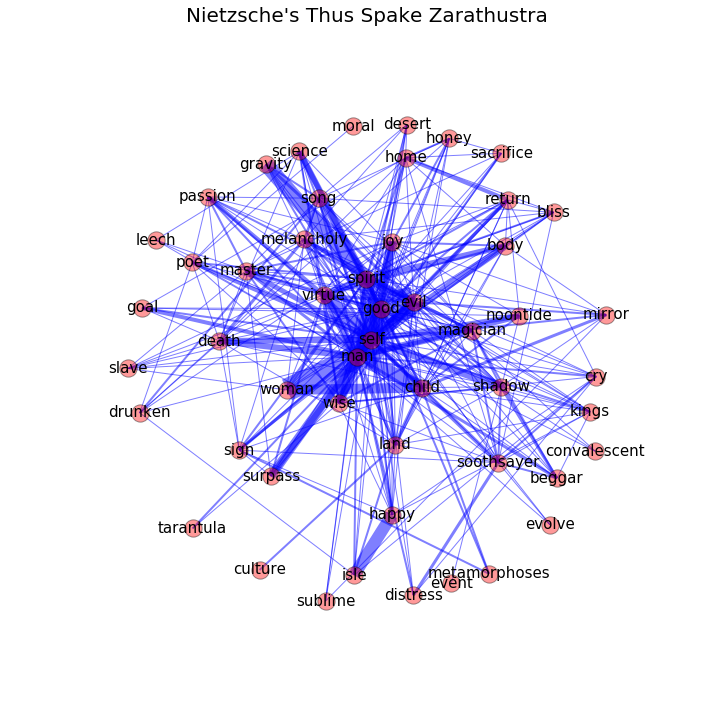

In [27]:

%autoreload 2
from utils import *
G=nx.Graph()

for eds,wei in dict_occurences.items():
#     print ed,wei
    ed=eds.split(' - ')
    
    G.add_edge(ed[0],ed[1],weight=wei)
    G.add_node(ed[0],label=ed[0])
    G.add_node(ed[1],label=ed[1])
# print G.nodes(data=True)


pos=nx.spring_layout(G,scale=50,k=0.35,iterations=30)
sstt="Nietzsche's Thus Spake Zarathustra"
posit=draw_network(G,sstt,pos=pos,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.4,ealpha=0.4,labelfont=15)



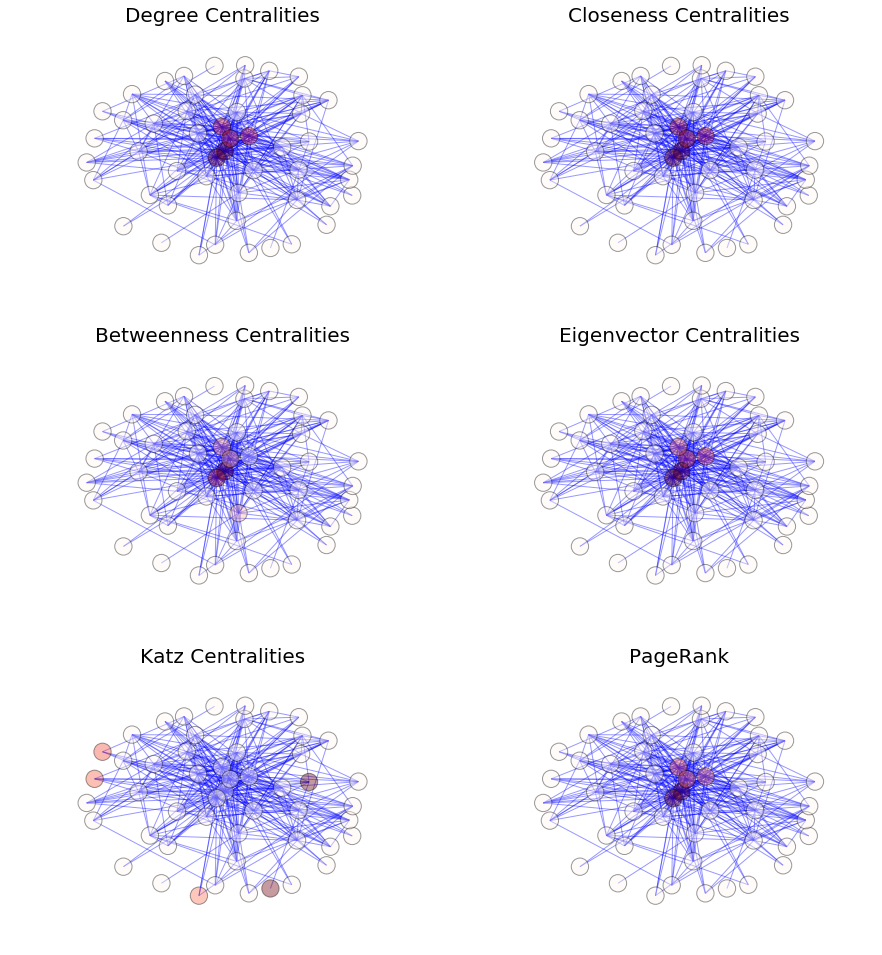

In [28]:
draw_centralities_subplots(G,pos,withLabels=False,labfs=5,figsi=(15,22))

Number of communities of Nietzsche's Thus Spake Zarathustra = 6
Community partition of Nietzsche's Thus Spake Zarathustra:
[['drunken', 'honey', 'good', 'death', 'desert', 'convalescent', 'melancholy', 'song', 'joy', 'evil', 'slave'], ['distress', 'beggar', 'evolve', 'soothsayer', 'shadow', 'magician', 'kings', 'cry'], ['sign', 'metamorphoses'], ['culture', 'isle', 'land', 'happy'], ['moral', 'mirror', 'home', 'gravity', 'poet', 'bliss', 'body', 'return', 'spirit', 'science', 'sublime'], ['surpass', 'event', 'goal', 'self', 'passion', 'master', 'leech', 'woman', 'sacrifice', 'virtue', 'child', 'man', 'wise', 'tarantula', 'noontide']]
Community modularity of Nietzsche's Thus Spake Zarathustra = 0.1755


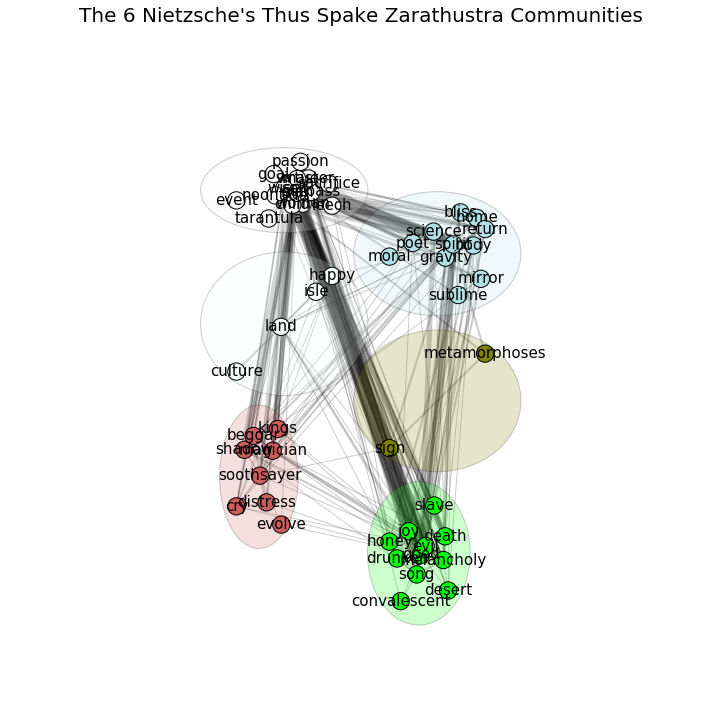

In [30]:
from chAs import draw_comms,modul_arity
import community as comm

part=comm.best_partition(G) 
print 'Number of communities of %s = %i' %(sstt, max(part.values())+1)
print 'Community partition of %s:' %(sstt)
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[i]
    else:
        partdi[k].append(i)
for i,k in partdi.items():
    parLis.append(k)
print parLis
nodper={i:i for i in G.nodes()}
print 'Community modularity of %s = %.4f' %(sstt, comm.modularity(part,G))

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15)